In [106]:
import pandas as pd
import matplotlib.pyplot as plt

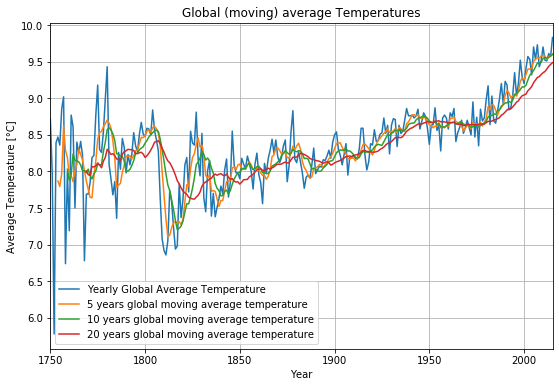

In [125]:
global_data = pd.read_csv('global_data.csv',
                          names=['Year', 'Yearly Global Average Temperature'],
                          index_col='Year',
                          header=0)
for window in [5, 10, 20]:
    global_data['%d years global moving average temperature' % (window)] =\
        global_data['Yearly Global Average Temperature'].rolling(window=window).mean()
    
_, ax = plt.subplots(figsize=(9, 6))
global_data.plot(ax=ax, title='Global (moving) average Temperatures')
plt.ylabel('Average Temperature [°C]')
plt.grid(True)
plt.savefig('./global_average_temperatures.png')

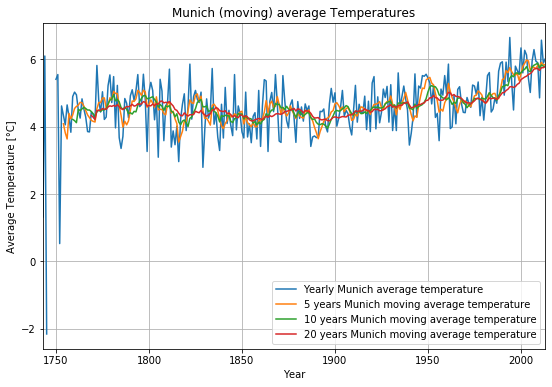

In [123]:
munich_data = pd.read_csv('munich_data.csv',
                          names=['Year', 'Yearly Munich average temperature'],
                          index_col='Year',
                          header=0)
for window in [5, 10, 20]:
    munich_data['%d years Munich moving average temperature' % (window)] =\
        munich_data['Yearly Munich average temperature'].rolling(window=window).mean()
    
_, ax = plt.subplots(figsize=(9, 6))
munich_data.plot(ax=ax, title='Munich (moving) average Temperatures')
plt.ylabel('Average Temperature [°C]')
plt.grid(True)
plt.savefig('./munich_average_temperatures.png')

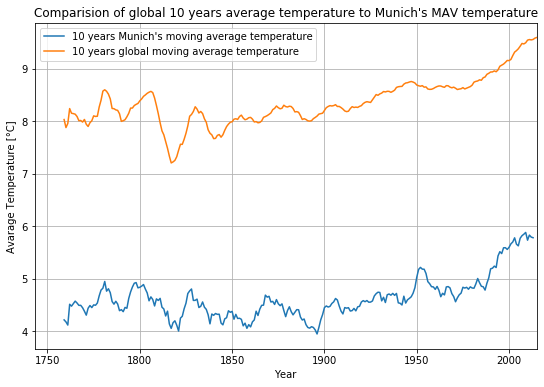

In [121]:
_, ax = plt.subplots(figsize=(9, 6))

comparison_plot = munich_data['10 years Munich moving average temperature'].plot()
global_data['10 years global moving average temperature'].plot(ax=comparison_plot,
    title="Comparision of global 10 years average temperature to Munich's MAV temperature")
handles, _ = ax.get_legend_handles_labels()
labels = ["10 years Munich's moving average temperature",
         '10 years global moving average temperature']
ax.legend(handles, labels)
plt.ylabel('Avarage Temperature [°C]')
plt.grid(True)
plt.savefig('./comparison_average_temperatures.png')


In [116]:
print(munich_data['10 years Munich moving average temperature'].head(20))
munich_data['Relative 10 years moving average'] = munich_data['10 years Munich moving average temperature'] / \
    munich_data.loc[1759, '10 years Munich moving average temperature'] * 100


Year
1743      NaN
1744      NaN
1745      NaN
1746      NaN
1747      NaN
1748      NaN
1749      NaN
1750      NaN
1751      NaN
1752      NaN
1753      NaN
1754      NaN
1755      NaN
1756      NaN
1757      NaN
1758      NaN
1759    4.212
1760    4.174
1761    4.114
1762    4.510
Name: 10 years Munich moving average temperature, dtype: float64


In [117]:
print(global_data['10 years global moving average temperature'].head(20))
global_data['Relative 10 years moving average'] = global_data['10 years global moving average temperature'] / \
    global_data.loc[1759, '10 years global moving average temperature'] * 100

Year
1750      NaN
1751      NaN
1752      NaN
1753      NaN
1754      NaN
1755      NaN
1756      NaN
1757      NaN
1758      NaN
1759    8.030
1760    7.877
1761    7.956
1762    8.239
1763    8.150
1764    8.143
1765    8.132
1766    8.088
1767    8.008
1768    8.012
1769    7.982
Name: 10 years global moving average temperature, dtype: float64


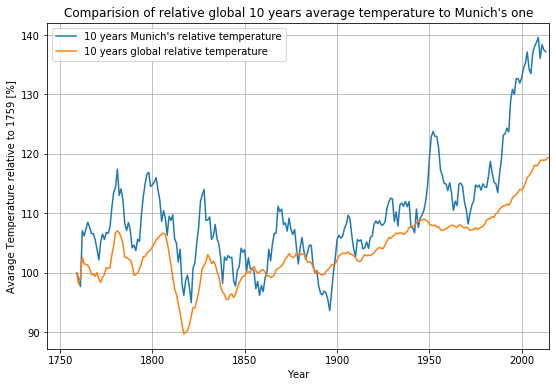

In [120]:
_, ax = plt.subplots(figsize=(9, 6))

comparison_plot = munich_data['Relative 10 years moving average'].plot()
global_data['Relative 10 years moving average'].plot(ax=comparison_plot,
    title="Comparision of relative global 10 years average temperature to Munich's one")
handles, _ = ax.get_legend_handles_labels()
labels = ["10 years Munich's relative temperature",
         '10 years global relative temperature']
ax.legend(handles, labels)
plt.ylabel('Avarage Temperature relative to 1759 [%]')
plt.grid(True)
plt.savefig('./rel_comparison_average_temperatures.png')

In [149]:
joined_table = pd.DataFrame(data=munich_data['Yearly Munich average temperature'])
joined_table = joined_table.rename(columns={'Yearly Munich average temperature': 'Munich'})
joined_table['Global'] = global_data['Yearly Global Average Temperature']

joined_latex = joined_table.to_latex()

fid = open('joined.tex', 'w')
fid.write(joined_latex)
fid.close()
